### Import knihoven a konfigurace

In [2]:
from improutils import *

import os
import io

import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

## Úkol

Výchozím bodem k tomuto úkolu je [cvičení na perspektivní transformaci](https://courses.fit.cvut.cz/BI-SVZ/tutorials/files/6/perspective-measuring-length.html).

### První část - rovnání dokumentu a následná aplikace OCR
Práce probíhá se souborem `ocr_img.jpg` na kterém se nachází dokument známých rozměrů (papír A4). Dokument je potřeba transformovat na kolmý pohled a následně využít OCR k automatizovanému přečtení textu. Za tuto část je možné získat maximálně **3 body** a **až 1 prémiový**.

![](data/image/ocr_img.jpg)

**1) Načtěte obrázek, zobrazte ho a uložte si pole cílových korespondečních souřadnic rohů dokumentu.**

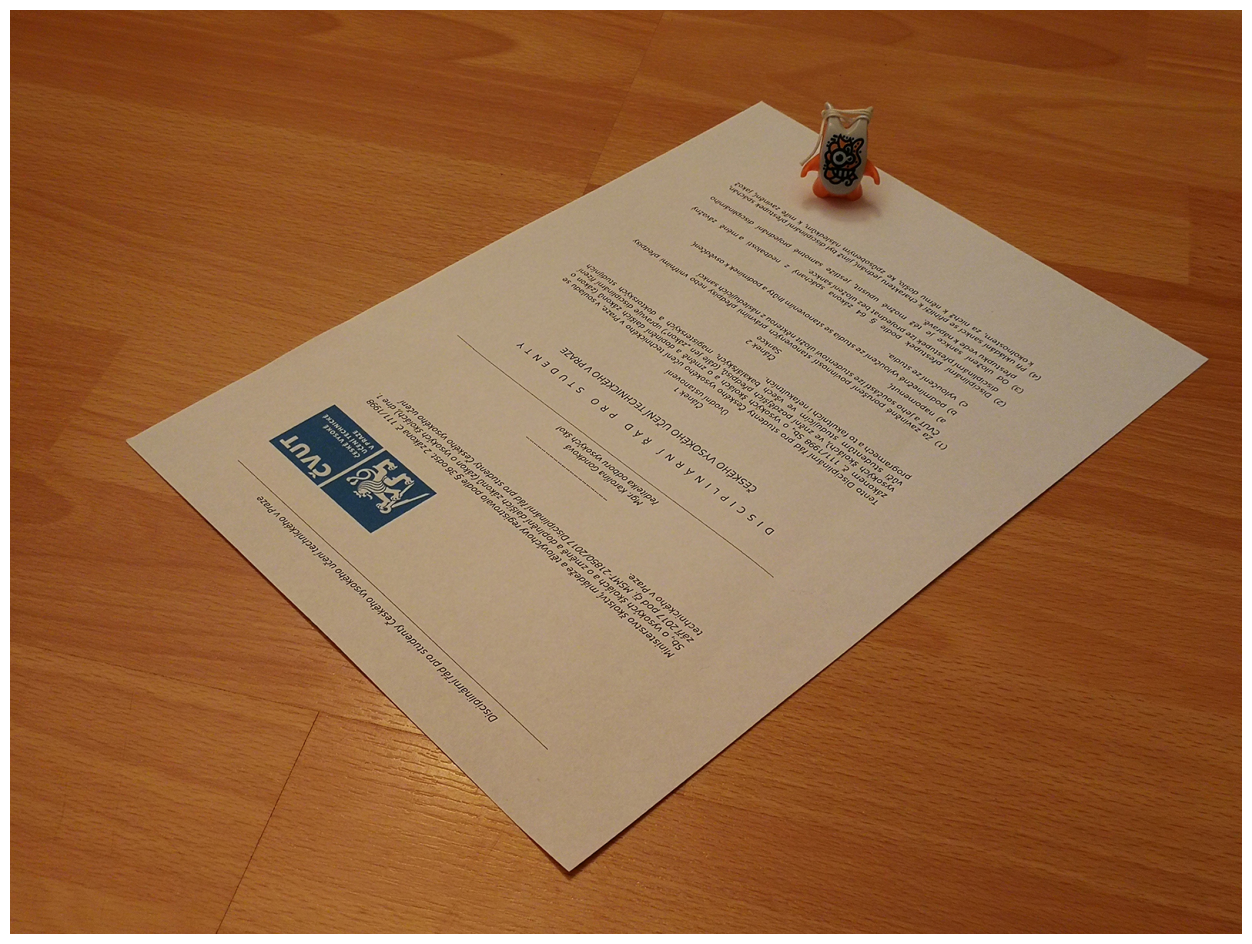

In [3]:
image = load_image("data/image/ocr_img.jpg")
plot_images(image)
real_world_pts = np.array([(0, 0),  (2970, 0), (2970, 2100), (0, 2100)])

**2) Pomocí oblíbeného grafického editoru vyberte obrazové souřadnice rohů dokumentu ve snímku.**  
Souřadnice musí korespondovat pořadím, takže pokud je levý roh první v předchozím poli, musí být první vybrán i v tomto kroku.

format: x, y 
 [[ 727 1122]
 [ 151  561]
 [ 976  121]
 [1557  456]]


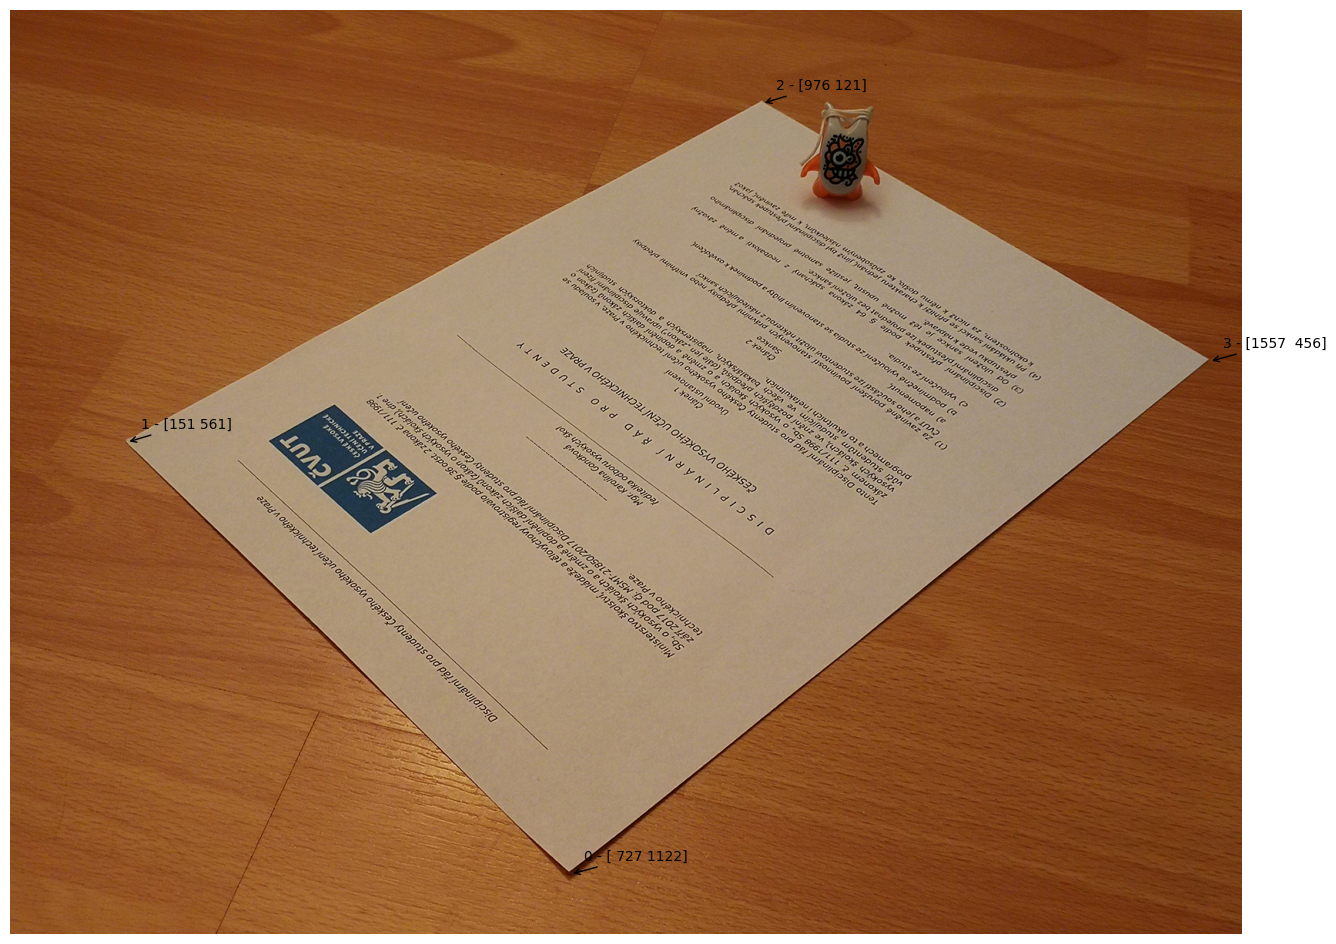

In [4]:
image_pts = np.array([(727, 1122),  (151, 561), (976, 121), (1557, 456)])

if (len(image_pts) != len(real_world_pts)):
    raise ValueError('Real world points and image points must be the same size.')

print('format: x, y \n', image_pts)

plot_images(image)
for i, pt in enumerate(image_pts):
    plt.annotate(str(i) + " - " + str(pt), xy=pt, textcoords="offset points", xytext=(10,10), arrowprops=dict(arrowstyle="->"))

**3) Vypočtěte transformační matici H, vypište její tvar.**

In [5]:
H, mask = cv2.findHomography(image_pts, real_world_pts)
print(H)

[[-3.134 -3.906 6661.599]
 [1.733 -1.780 736.625]
 [-0.000 0.001 1.000]]


**4) Popište rozdíl mezi [`cv2.getPerspectiveTransform()`](https://docs.opencv.org/3.4.1/da/d54/group__imgproc__transform.html#ga8c1ae0e3589a9d77fffc962c49b22043) a [`cv2.findHomography`](https://docs.opencv.org/3.4.1/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780).**

getPerspectiveTransform(): Calculates a perspective transform from four pairs of the corresponding points. Needs precisely 4 points, maps direclty between two aresa

findHomography(): Finds a perspective transformation between two planes. Can work with more, than 4 points (minimal is 4). Can filter wrong matching points

**5) Využijte funkci [`cv2.warpPerspective`](https://docs.opencv.org/3.4.1/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87) k vytvoření kolmého pohledu dokumentu, výsledek zobrazte a uložte.**

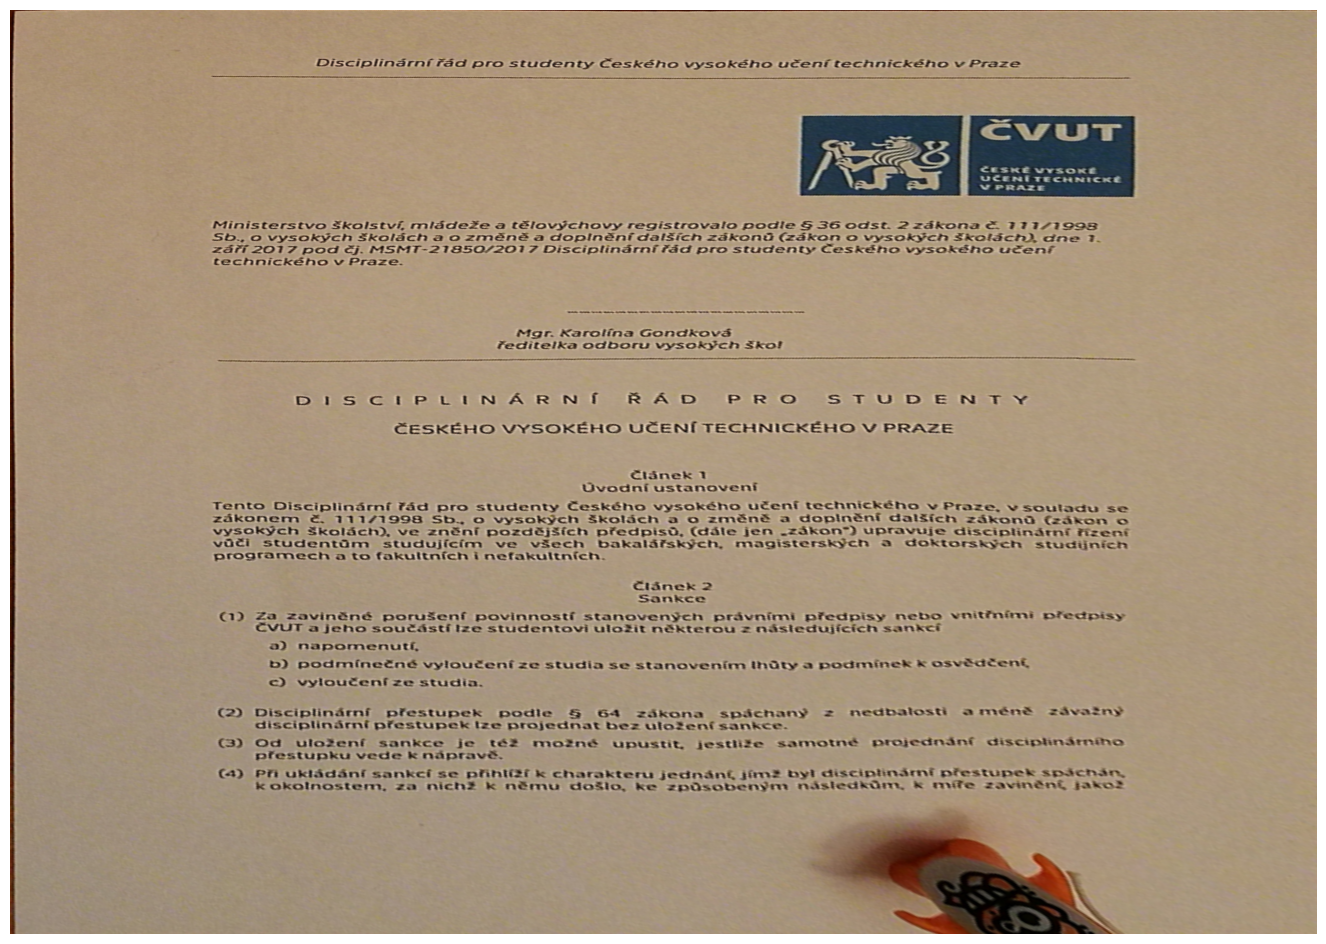

In [7]:
warped = cv2.warpPerspective(image, H, (2970, 2100))
plot_images(warped)

**6) Segmentujte text z "narovnaného" obrázku**
Vyberte vhodnou segmentační funkci z [modulu segmentation v improutils](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py).

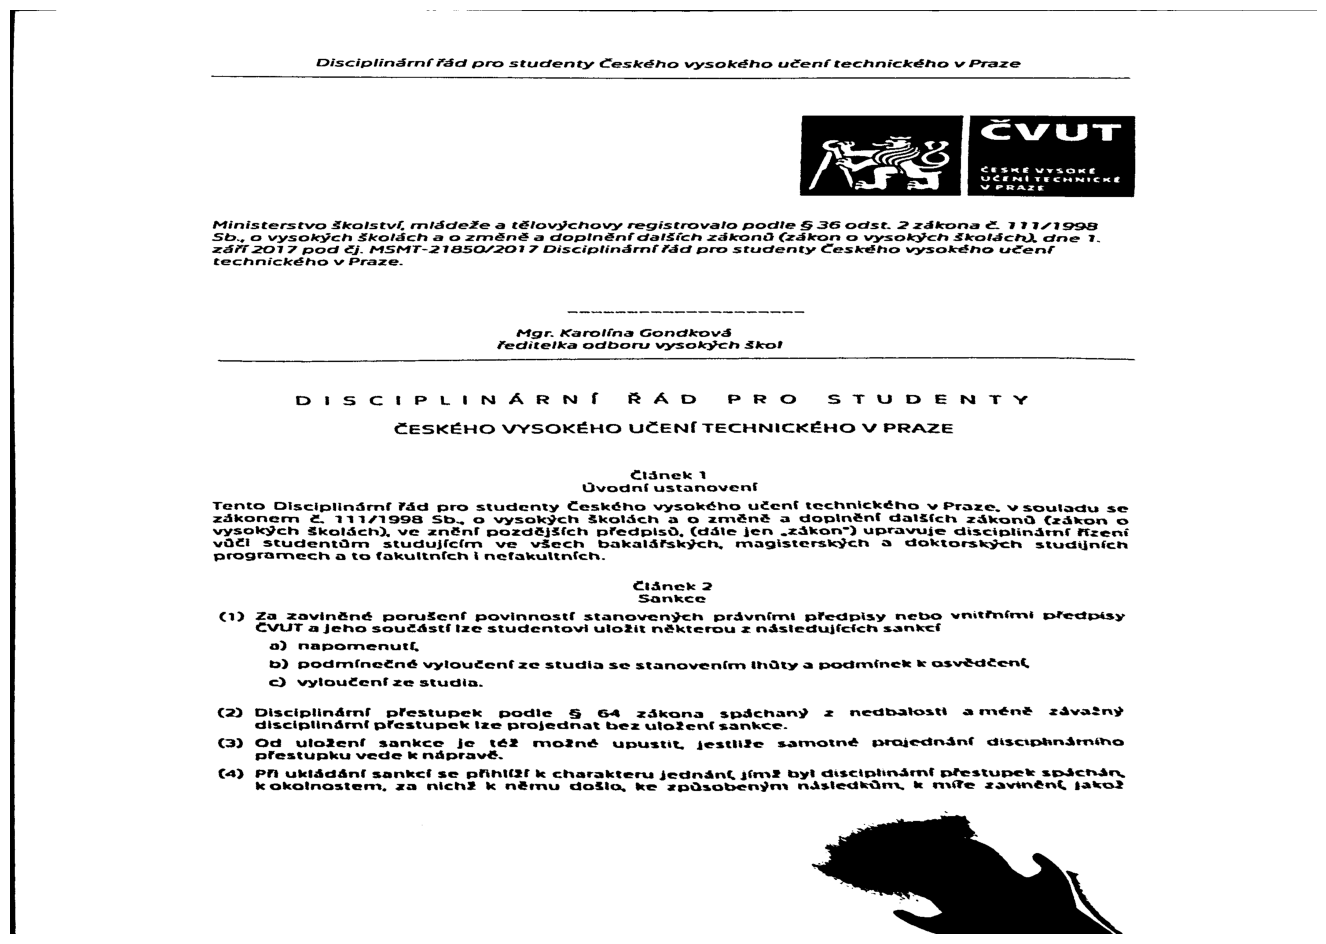

In [11]:
warped_gray = to_gray(warped)
#warped_gray = negative(warped_gray)
img_bin = segmentation_one_threshold(warped_gray, 125)
plot_images(img_bin)

**7) Detekujte text na "narovnaném" obraze, text vypište a uložte do textového souboru.**

Pro detekci využijte funkci [ocr](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/recognition/ocr.py#L7).

In [9]:
text = ocr(img_bin, lang="ces")

In [13]:
import builtins

with builtins.open("text.txt", "w") as f:
    f.write(text)
with builtins.open("text.txt", "r") as f:
    print(f.read())

ČVUT

ČESNÉ WYSOKÉ
WUWČEMNÍ TECHNO
VPRAZE

Ministerstvo školství, rniádeže a tělovýchovy registrovalo podle S 36 odst. > z3dkona ©. 1313/1098
Sb., o vysokých školách a o změně a doplněn dalších zákonů (Zákon o vysokých Škotách), cirne 1.
září 2017 pod čj. P45MT-2 1850/2017? Disciplinární řád pro studenty Českého vysokého wčenf
technického v Praze.

Mgr. Karolína Gornďdkově
ředitelka odboru vysokých ško!

DIS CIPLIN ÁRN Ř Á D PRO STUB EN TY

ČESKÉHO VYSOKÉHO UČENÍ TECHNICKÉHO V PRAZE

Článek t
Dvodní ustanovení

Tento Disciplinární řád pro studenty Českého vysokého učení tochnického w Praze. v souladu se
zákonem č. 1113/1998 Sb. o vysokých školách a o změně a doplnění datších zákonů (zákon o
vysokých školách). ve znění pozdějších předpisů, (dáte jen „zákon“ upravuje disciplinární řírení
vůči studentům studující ve všech bakalářských, magisterských A doktorských studijních
programech a to fakultních i nofakultních.

Čtánek 2
Sankce

C1) Za zaviněné porušení povinností stanovených právním

#### Bonus k první části
Jak je vidět, výsledky po aplikaci OCR nejsou zcela uspokojivé. Je však v nutné brát potaz, že vstupní obraz není kromě geometrické transformace nijak dále předzpracován.

**8) Pokuste se vstupní obraz před aplikací OCR kvalitněji předzpracovat pomocí probíraných technik - crop, segmentace, zaostření, rozmazání, jas, kontrast, apod. Fantazii se meze nekladou. Stručně diskutujte poznatky a vlivy jednotlivých operací na výslednou kvalitu. <span style="color:blue">(0.5 bodu)</span>**


**9) Upravte krok 2) tak, aby souřadnice rohů papíru byly detekovány automaticky. <span style="color:blue">(1 bod)</span>**

Pro zobrazení nápovědy rozklikněte tohle markdown pole.
<!-- 

Hints: 
PLOT EACH STEP, it really helps!

-> gaussian blur
-> canny
-> findContours(RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)
-> find largest contour by contourArea(converHull(contour)) since the FIT logo will likely be detected as a contour
-> approxPolyDP(contour, eps)
-> simplify poly approximation down to 4 points:

Find centroid of points (average of points), 
sort points by their angle: np.arctan2(*(point-centroid).

Iterate over points, always keeping track of 2 neighbouring points.

Calculate distance of middle point from the line connecting its neighbouring points.

 left = (i-1)%n 
 mid = i  
 right = (i+1) % n
 __________________________________
| left                 right      |
|  x--------------------x         |
|            ^                    |
|            |                    |
|            | distance           |
|            x                    |
|           mid                   |
|_________________________________|

Find 4 points with the largest distance. 
The idea is, that if the distance is small, the 3 points are likely on a single line.
Therefore the midpoint can be omitted.

Points with large distance are likely corners of the paper.

-> The 4 points can now be rotated, np.roll can be helpful in this case.
-> Good job, you're basically a computer vision wizard at this point!

-->